二项分布

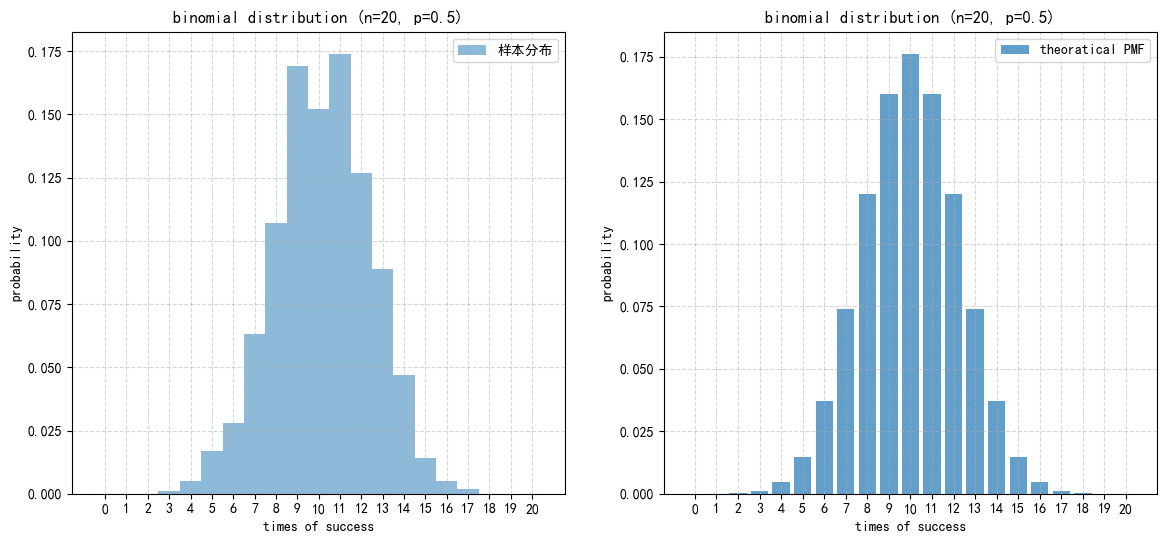

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_B:
    def __init__(self,n,p):
        samples = np.random.binomial(n, p, 1000)
        self.samples = samples
        self.k = range(0,n+1)
        self.f = [comb(n,i)*(p**(i))*((1-p)**(n-i)) for i in self.k]
n = 20
p = 0.5
a = X_B(n,p)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(14, 6)) 
ax1.hist(a.samples, bins=np.arange(-0.5, n+1.5, 1), density=True, alpha=0.5, label='样本分布')
ax2.bar(a.k, a.f, alpha=0.7, label='theoratical PMF')
ax1.set_title(f'binomial distribution (n={n}, p={p})')
ax1.set_xlabel('times of success')
ax1.set_ylabel('probability')
ax1.set_xticks(range(n+1))               # 设置x轴刻度为0~10
ax1.legend()  # 显示图例
ax1.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
ax2.set_title(f'binomial distribution (n={n}, p={p})')
ax2.set_xlabel('times of success')
ax2.set_ylabel('probability')
ax2.set_xticks(range(n+1))               # 设置x轴刻度为0~10
ax2.legend()  # 显示图例
ax2.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

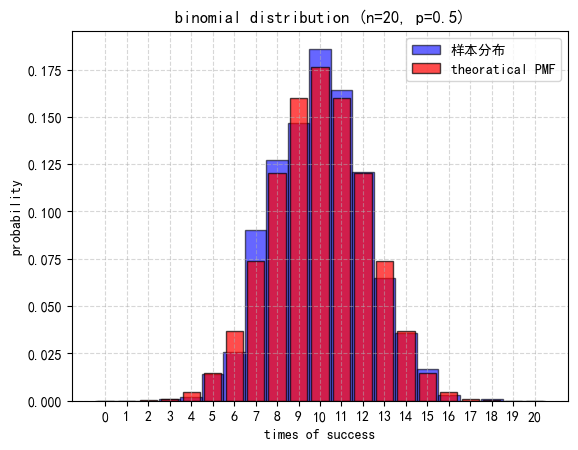

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from math import comb
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_B:
    def __init__(self,n,p):
        samples = np.random.binomial(n, p, 1000)
        self.samples = samples
        self.k = range(0,n+1)
        self.f = [comb(n,i)*(p**(i))*((1-p)**(n-i)) for i in self.k]
n = 20
p = 0.5
a = X_B(n,p)
figsize=(14, 6)
plt.hist(a.samples, bins=np.arange(-0.5, n+1.5, 1), density=True, color='blue', alpha=0.6, edgecolor='black', label='样本分布')
plt.bar(a.k, a.f, color='red', alpha=0.7, edgecolor='black', label='theoratical PMF')
plt.title(f'binomial distribution (n={n}, p={p})')
plt.xlabel('times of success')
plt.ylabel('probability')
plt.xticks(range(n+1))               # 设置x轴刻度为0~10
plt.legend()  # 显示图例
plt.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

泊松分布

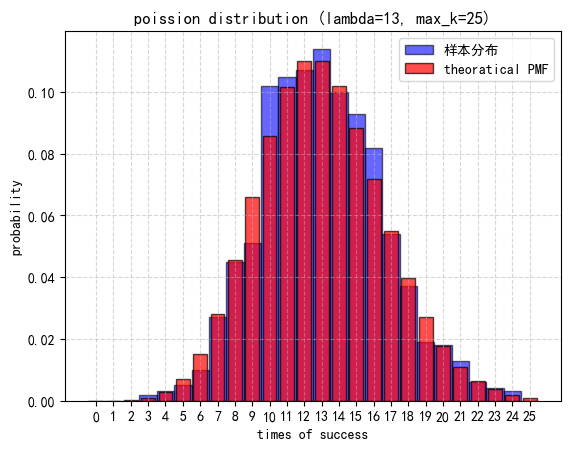

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_P:
    def __init__(self,lambda_, max_k):
        samples = np.random.poisson(lambda_, 1000)
        self.samples = samples
        self.k = range(0, max_k+1)
        self.f = [exp(-lambda_) * (lambda_**k) / factorial(k) for k in self.k]
    
lambda_ = 13
max_k = 25
a = X_P(lambda_, max_k)
figsize=(14, 6)
plt.hist(a.samples, bins=np.arange(-0.5, max_k+1.5, 1), density=True, color='blue', alpha=0.6, edgecolor='black', label='样本分布')
plt.bar(a.k, a.f, color='red', alpha=0.7, edgecolor='black', label='theoratical PMF')
plt.title(f'poission distribution (lambda={lambda_}, max_k={max_k})')
plt.xlabel('times of success')
plt.ylabel('probability')
plt.xticks(range(max_k+1))               # 设置x轴刻度为0~10
plt.legend()  # 显示图例
plt.grid(True, linestyle='--', alpha=0.5)  # 添加虚线网格
plt.show()

二项分布与泊松分布比较

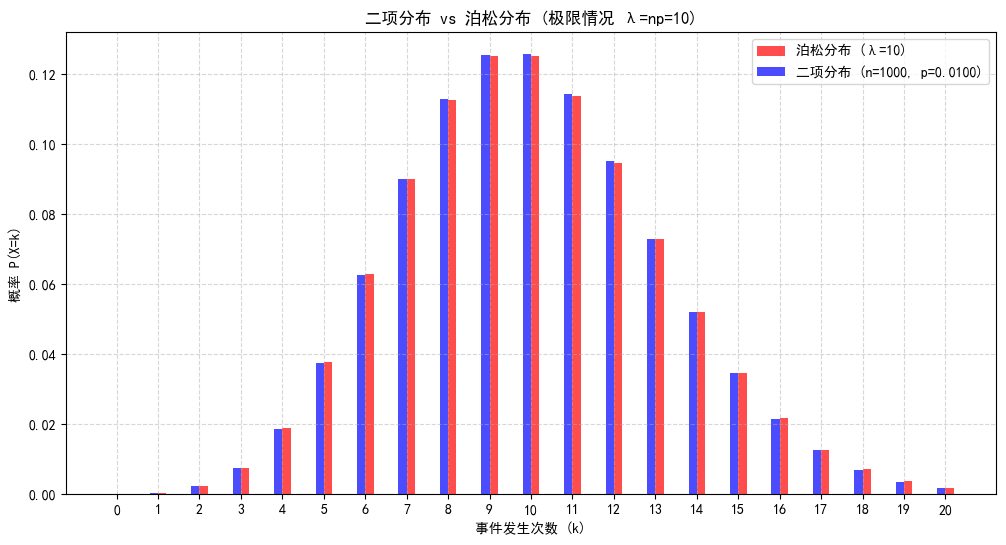

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial,comb,log
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
class X_P:
    def __init__(self,lambda_, max_k):
        self.k = np.arange(0, max_k+1)
        self.f = [exp(-lambda_ + k*log(lambda_) - log(factorial(k))) for k in self.k]

class X_B:
    def __init__(self,n,p,max_k):
        self.k = np.arange(0,n+1)
        self.f = [exp(log(comb(n,i)) + i*log(p) + (n-i)*log(1-p)) for i in self.k[0:max_k+1]]

lambda_ = 10
max_k = 20
n = 1000
p = lambda_/n
a = X_P(lambda_, max_k)
plt.figure(figsize=(12, 6))
plt.bar(a.k+0.1, a.f, width=0.2, color='red', alpha=0.7, label=f'泊松分布 (λ={lambda_})')
b = X_B(n, p, max_k)
plt.bar(b.k[0:max_k+1]-0.1, b.f, width=0.2, color='blue', alpha=0.7, label=f'二项分布 (n={n}, p={p:.4f})')
plt.title(f'二项分布 vs 泊松分布 (极限情况 λ=np={lambda_})')
plt.xlabel('事件发生次数 (k)')
plt.ylabel('概率 P(X=k)')
plt.xticks(range(max_k+1))
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

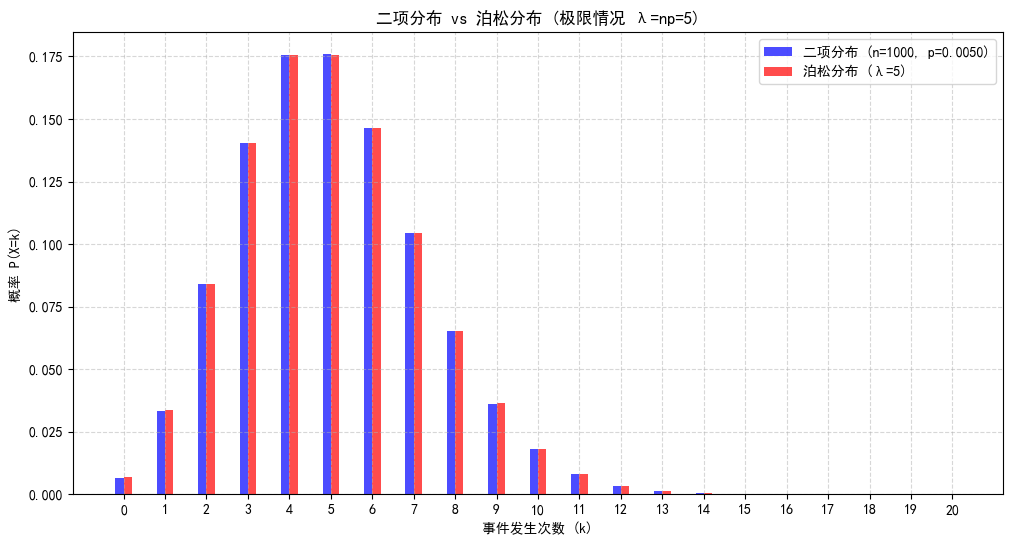

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom, poisson

# ========== 配置中文字体 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows
plt.rcParams['axes.unicode_minus'] = False    # 修复负号

# ========== 参数设置 ==========
lambda_ = 5         # 泊松分布参数λ
n_binomial = 1000   # 二项分布的试验次数n
p_binomial = lambda_ / n_binomial  # 二项分布的成功概率p = λ/n
max_k = 20          # 显示的最大k值

# ========== 计算PMF ==========
k_values = np.arange(0, max_k+1)

# 二项分布PMF
binom_pmf = binom.pmf(k_values, n_binomial, p_binomial)

# 泊松分布PMF
poisson_pmf = poisson.pmf(k_values, mu=lambda_)

# ========== 可视化 ==========
plt.figure(figsize=(12, 6))

# 绘制二项分布
plt.bar(k_values - 0.1, binom_pmf, 
        width=0.2, 
        color='blue', 
        alpha=0.7, 
        label=f'二项分布 (n={n_binomial}, p={p_binomial:.4f})')

# 绘制泊松分布
plt.bar(k_values + 0.1, poisson_pmf, 
        width=0.2, 
        color='red', 
        alpha=0.7, 
        label=f'泊松分布 (λ={lambda_})')

# 图表装饰
plt.title('二项分布 vs 泊松分布 (极限情况 λ=np=5)')
plt.xlabel('事件发生次数 (k)')
plt.ylabel('概率 P(X=k)')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

均匀分布

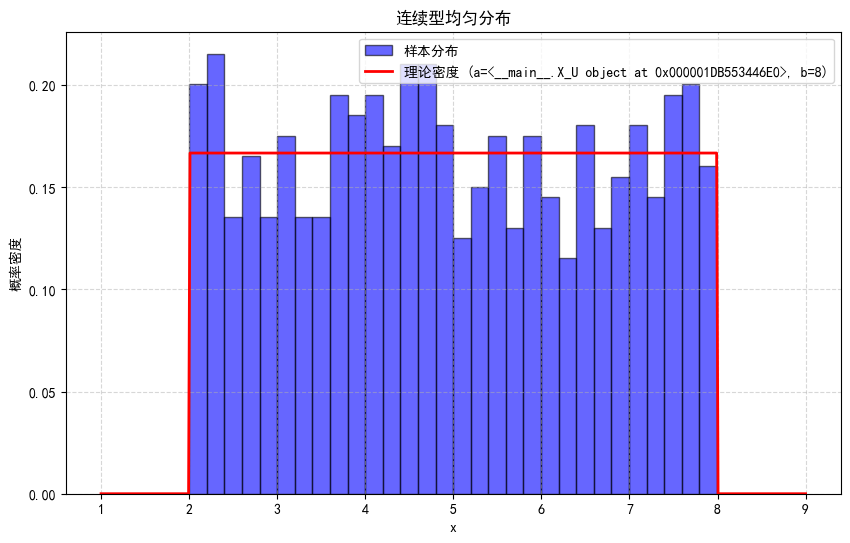

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 全局设置 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体

class X_U:
    def __init__(self, a, b, sample_size):
        self.sample_size = sample_size
        self.samples = np.random.uniform(a, b, sample_size)
        x = np.linspace(a-1, b+1, 500)  # 生成x轴范围
        self.x = x
        self.pdf = np.where((x >= a) & (x <= b), 1/(b-a), 0)  # 区间内密度为1/(b-a)

a = 2
b = 8
sample_size = 1000

a = X_U(a, b, sample_size)
# ========== 可视化 ==========
plt.figure(figsize=(10, 6))

# 绘制样本直方图
plt.hist(a.samples, 
         bins=30, 
         density=True, 
         alpha=0.6, 
         color='blue', 
         edgecolor='black', 
         label='样本分布')

# 绘制理论概率密度函数
plt.plot(a.x, a.pdf, 
        'r-', 
        linewidth=2, 
        label=f'理论密度 (a={a}, b={b})')

# 图表装饰
plt.title('连续型均匀分布')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

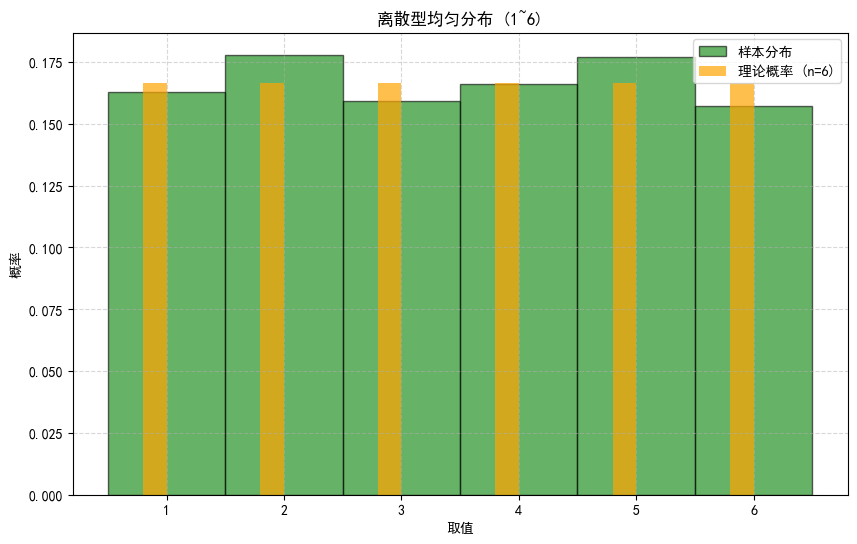

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 全局设置 ==========
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体
plt.rcParams['axes.unicode_minus'] = False    # 修复负号显示

# ========== 参数设置 ==========
low = 1      # 最小值（包含）
high = 7     # 最大值（不包含，实际生成1~6）
sample_size = 1000  # 生成样本数量
k_values = np.arange(low, high)  # 可能取值 [1,2,3,4,5,6]

# ========== 生成数据 ==========
samples = np.random.randint(low, high, sample_size)  # 生成离散均匀分布样本

# ========== 理论概率质量函数 ==========
n = high - low  # 可能取值数量
pmf = [1/n] * n  # 每个值的概率为1/n

# ========== 可视化 ==========
plt.figure(figsize=(10, 6))

# 绘制样本频数直方图
plt.hist(samples, 
         bins=np.arange(low-0.5, high+0.5, 1),  # 对齐整数刻度
         density=True, 
         alpha=0.6, 
         color='green', 
         edgecolor='black', 
         label='样本分布')

# 绘制理论概率质量函数
plt.bar(k_values - 0.1,  # 向左偏移0.1
        pmf, 
        width=0.2, 
        color='orange', 
        alpha=0.7, 
        label=f'理论概率 (n={n})')

# 图表装饰
plt.title(f'离散型均匀分布 ({low}~{high-1})')
plt.xlabel('取值')
plt.ylabel('概率')
plt.xticks(k_values)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

高斯分布

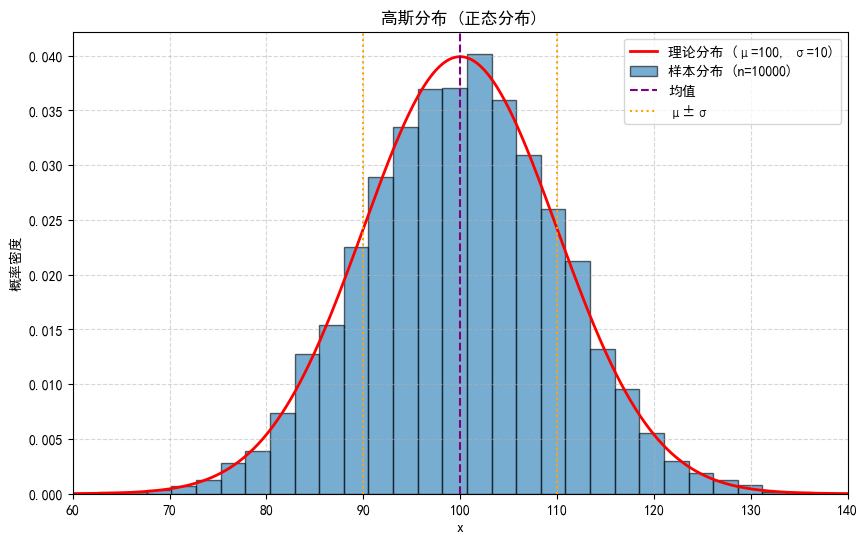

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, exp
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体（Windows）

def gaussian_pdf(x, mu, sigma):
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coeff * np.exp(exponent)

class X_N:
    def __init__(self, mu, sigma, sec, sample_size):
        self.mu = mu
        self.sigma = sigma
        samples = np.random.normal(loc=mu, scale=sigma, size=sample_size)
        self.samples = samples
        self.x = np.linspace(sec[0], sec[1], 1000)
        self.pdf = gaussian_pdf(self.x, mu, sigma)

mu = 100
sigma = 10
sec = [mu - 4*sigma, mu + 4*sigma]
sample_size = 10000
a = X_N(mu, sigma, sec, sample_size)
plt.figure(figsize=(10, 6))
plt.plot(a.x, a.pdf, 
         'r-', 
         linewidth=2, 
         label=f'理论分布 (μ={mu}, σ={sigma})')
plt.hist(a.samples, 
         bins=30, 
         density=True, 
         alpha=0.6, 
         color='#1f77b4', 
         edgecolor='black', 
         label=f'样本分布 (n={sample_size})')
plt.axvline(x=mu, color='purple', linestyle='--', linewidth=1.5, label='均值')
plt.axvline(x=mu + sigma, color='orange', linestyle=':', linewidth=1.5, label='μ±σ')
plt.axvline(x=mu - sigma, color='orange', linestyle=':')
plt.title(f'高斯分布 (正态分布)')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.xlim(sec)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

高斯分布与泊松分布比较

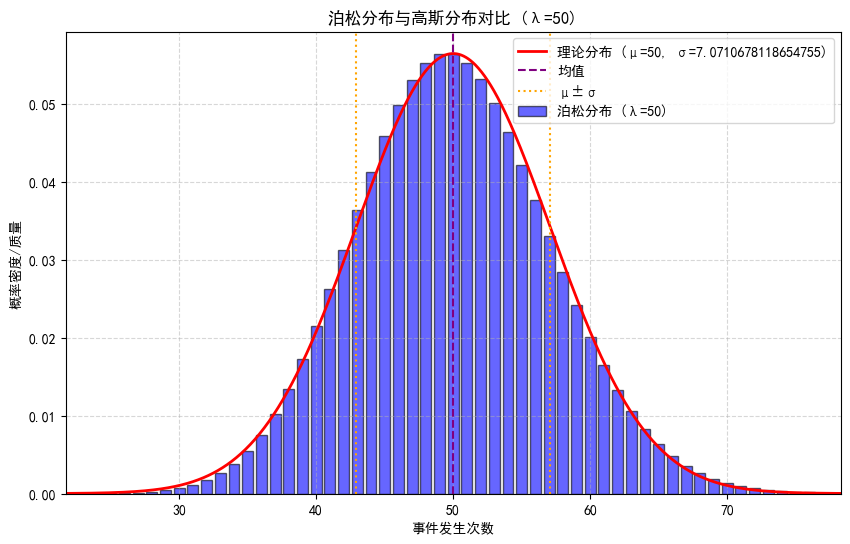

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sqrt, exp, log, factorial
plt.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体（Windows）

def gaussian_pdf(x, mu, sigma):
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coeff * np.exp(exponent)

class X_N:
    def __init__(self, mu, sigma, sec):
        self.x = np.linspace(sec[0], sec[1], 1000)
        self.pdf = gaussian_pdf(self.x, mu, sigma)

class X_P:
    def __init__(self,lambda_, max_k):
        self.k = np.arange(0, max_k+1)
        self.f = [exp(-lambda_ + k*log(lambda_) - log(factorial(k))) for k in self.k]
mu = 50
sigma = sqrt(mu)
sec = [mu - 4*sigma, mu + 4*sigma]
lambda_ = mu
max_k = int(mu + 4*sigma+1)

n_d = X_N(mu, sigma, sec)
n_p = X_P(lambda_, max_k)

plt.figure(figsize=(10, 6))
plt.plot(n_d.x, n_d.pdf, 
         'r-', 
         linewidth=2, 
         label=f'理论分布 (μ={mu}, σ={sigma})')
plt.bar(n_p.k, n_p.f, 
        width=0.8, 
        alpha=0.6, 
        color='blue', 
        edgecolor='black', 
        label=f'泊松分布 (λ={lambda_})')
# 标注统计量
plt.axvline(lambda_, color='purple', linestyle='--', linewidth=1.5, label='均值')
plt.axvline(lambda_ + sigma, color='orange', linestyle=':', linewidth=1.5, label='μ±σ')
plt.axvline(lambda_ - sigma, color='orange', linestyle=':')

# 图表装饰
plt.title(f'泊松分布与高斯分布对比 (λ={lambda_})')
plt.xlabel('事件发生次数')
plt.ylabel('概率密度/质量')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.xlim(sec)
plt.show()

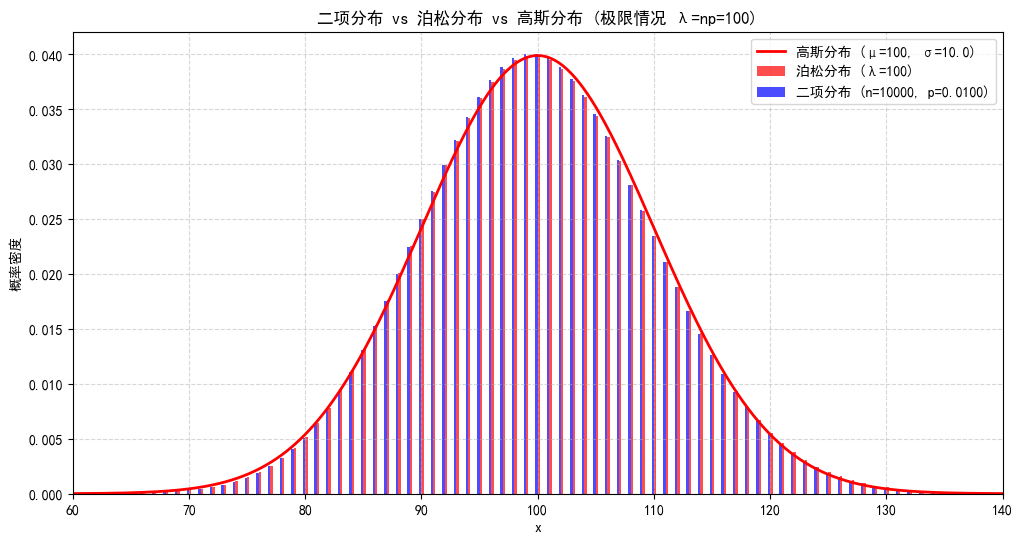

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp,factorial,comb,log,pi,sqrt
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows 系统
def gaussian_pdf(x, mu, sigma):
    coeff = 1 / (sigma * np.sqrt(2 * np.pi))
    exponent = -((x - mu)**2) / (2 * sigma**2)
    return coeff * np.exp(exponent)

class X_N:
    def __init__(self, mu, sigma, sec):
        self.x = np.linspace(sec[0], sec[1], 1000)
        self.pdf = gaussian_pdf(self.x, mu, sigma)

class X_P:
    def __init__(self,lambda_, max_k):
        self.k = np.arange(0, max_k+1)
        self.f = [exp(-lambda_ + k*log(lambda_) - log(factorial(k))) for k in self.k]

class X_B:
    def __init__(self,n,p,max_k):
        self.k = np.arange(0,n+1)
        self.f = [exp(log(comb(n,i)) + i*log(p) + (n-i)*log(1-p)) for i in self.k[0:max_k+1]]

lambda_ = 100
mu = lambda_
sigma = sqrt(mu)
sec = [mu - 4*sigma, mu + 4*sigma]
max_k = int(mu + 4*sigma + 1)
n = 10000
p = lambda_/n
a = X_P(lambda_, max_k)
plt.figure(figsize=(12, 6))
plt.bar(a.k+0.1, a.f, width=0.2, color='red', alpha=0.7, label=f'泊松分布 (λ={lambda_})')
b = X_B(n, p, max_k)
plt.bar(b.k[0:max_k+1]-0.1, b.f, width=0.2, color='blue', alpha=0.7, label=f'二项分布 (n={n}, p={p:.4f})')
n_d = X_N(mu, sigma, sec)
plt.plot(n_d.x, n_d.pdf, 
         'r-', 
         linewidth=2, 
         label=f'高斯分布 (μ={mu}, σ={sigma})')
plt.title(f'二项分布 vs 泊松分布 vs 高斯分布 (极限情况 λ=np={lambda_})')
plt.xlabel('x')
plt.ylabel('概率密度')
plt.xlim(sec)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()